In [4]:
from std_methods import std_methods

tickers = ['AAPL','JPM','F','PG', 'BA']

equal_weights,min_risk,risk_parity = std_methods(tickers,'1992-01-01','2022-18-31','2023-01-01','2023-12-31')

from enviroments.benchmark import create_env_benchmark


investment_period = 1 # each 1 investment days 
reward_period = 15 # each 15 investment periods
eval_env,eval_dates,eval_benchmark,prices = create_env_benchmark(tickers,'2023-01-01','2023-12-31',investment_period,reward_period)

[7.95985831e-12 3.45395956e-11 9.47447097e-01 5.09396416e-02
 1.61326095e-03]
[0.02270654 0.0285299  0.9138212  0.03045487 0.00448748]


In [5]:

import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model,env):
    done = False
    rewards = []
    portfolio_worths = []
    obs = env.reset()
    portfolio_worths.append(1.0)
    drawdowns = []
    max_worth = 1.0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done,info = env.step(action)
        portfolio_worths.append(info[0]['porfolio_worth'])
        max_worth = max(max_worth,info[0]['porfolio_worth'])
        drawdown = (max_worth - info[0]['porfolio_worth'])
        drawdowns.append(drawdown)
        rewards.append(reward)
    return np.array(rewards),np.array(portfolio_worths),np.array(drawdowns)


def extract_portfolio(eval_env, eval_benchmark, model):
    rewards,portfolio_worths,drawdowns = evaluate_model(model,eval_env)
    monthly_portfolio_worths = portfolio_worths[::25]
    monthly_portfolio_returns = np.diff(monthly_portfolio_worths)/monthly_portfolio_worths[:-1]
    sharpe_ratio = np.mean(monthly_portfolio_returns)/np.std(monthly_portfolio_returns)
    
    monthly_benchmark_worths = eval_benchmark[::25]
    monthly_benchmark_returns = np.diff(monthly_benchmark_worths)/monthly_benchmark_worths[:-1]
    excess_returns = monthly_portfolio_returns - monthly_benchmark_returns
    information_ratio = np.mean(excess_returns)/np.std(excess_returns)
    max_drawdown = np.max(drawdowns)
    
    return portfolio_worths,sharpe_ratio,information_ratio,max_drawdown

d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.73GB
  warnings.warn(


paper Sharpe Ratio: 0.0660169351874154,  Information Ratio: -0.18598381195932664, Final Portfolio Worth: 1.0977869585348892, Max Drawdown: 0.1598851199991147


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.67GB
  warnings.warn(


max gain 0 Sharpe Ratio: -0.09456865527923776,  Information Ratio: -0.2856109293082706, Final Portfolio Worth: 0.9956475524060298, Max Drawdown: 0.16233498402851965


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.68GB
  warnings.warn(


max gain 0.25 Sharpe Ratio: -0.11130712231213687,  Information Ratio: -0.2591365980620381, Final Portfolio Worth: 0.9750864171787172, Max Drawdown: 0.2477461824149899


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.69GB
  warnings.warn(


max gain 0.5 Sharpe Ratio: 0.4279448311031355,  Information Ratio: 0.5033450419773816, Final Portfolio Worth: 1.2150760669094074, Max Drawdown: 0.14308263137158939
max gain 0.75 Sharpe Ratio: 0.24743697379722698,  Information Ratio: 0.1589605368077691, Final Portfolio Worth: 1.254454884641276, Max Drawdown: 0.24989274709789755
max gain 1 Sharpe Ratio: 0.01813080063534646,  Information Ratio: -0.16367639973683495, Final Portfolio Worth: 1.085997709931885, Max Drawdown: 0.1822330176849858
benchmark 0 Sharpe Ratio: 0.43972560128606997,  Information Ratio: 0.3891780250870031, Final Portfolio Worth: 1.1999836775780335, Max Drawdown: 0.13776232555984724
benchmark 0.25 Sharpe Ratio: 0.4010796207393547,  Information Ratio: 0.36533347304046426, Final Portfolio Worth: 1.2548644694829554, Max Drawdown: 0.15954718588449368
benchmark 0.5 Sharpe Ratio: 0.07587331956309815,  Information Ratio: -0.12956628268533915, Final Portfolio Worth: 1.109119428091212, Max Drawdown: 0.1579979602234668
benchmark 0

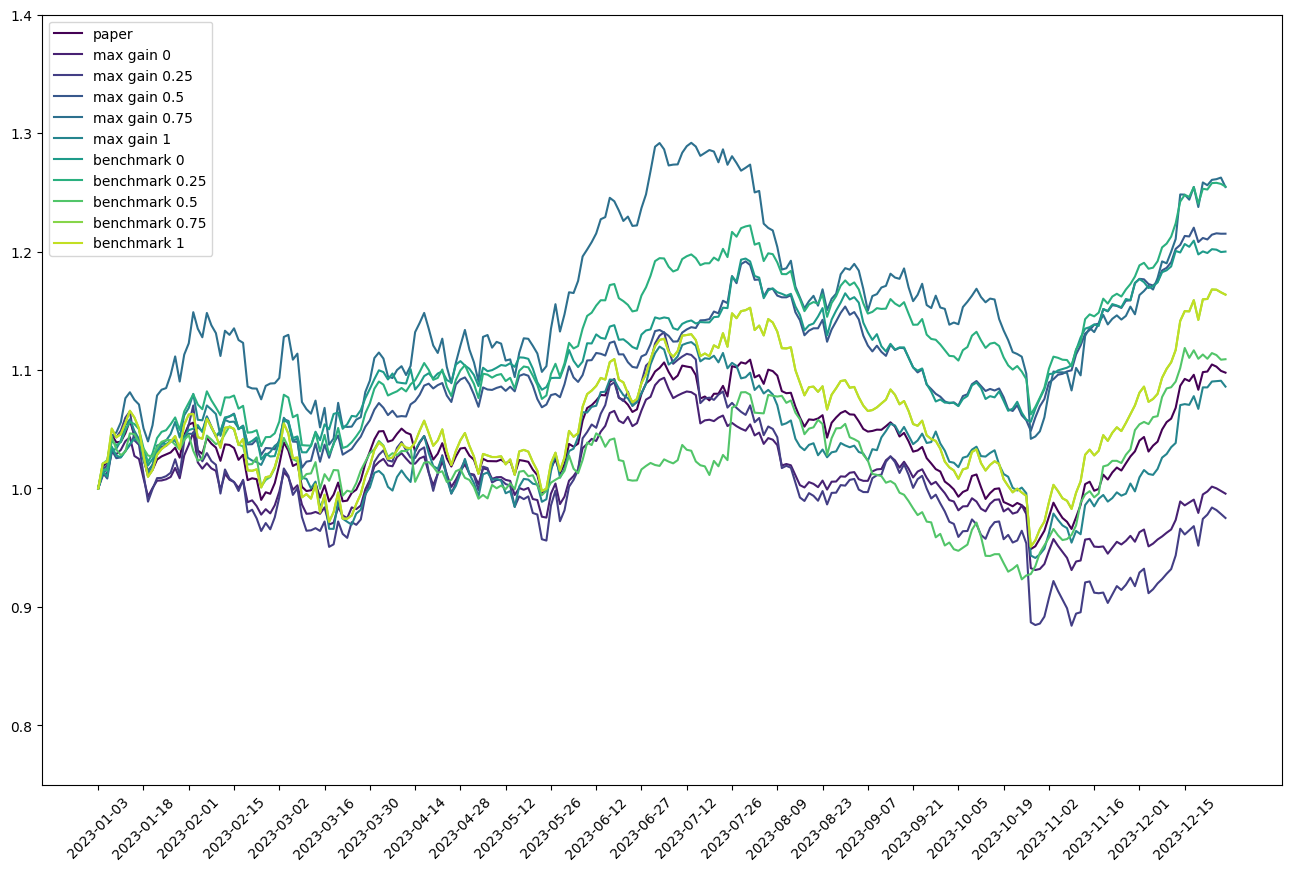

In [6]:

from stable_baselines3 import SAC
models = {
    'paper': 'paper',
    'max gain 0': 'SAC_max_gain_risk_0_inv_1_rew_15',
    'max gain 0.25': 'SAC_max_gain_risk_0.25_inv_1_rew_15',
    'max gain 0.5': 'SAC_max_gain_risk_0.5_inv_1_rew_15',
    'max gain 0.75': 'SAC_max_gain_risk_0.75_inv_1_rew_15',
    'max gain 1': 'SAC_max_gain_risk_1_inv_1_rew_15',
    'benchmark 0': 'SAC_benchmark_risk_0_inv_1_rew_15',
    'benchmark 0.25': 'SAC_benchmark_risk_0.25_inv_1_rew_15',
    'benchmark 0.5': 'SAC_benchmark_risk_0.5_inv_1_rew_15',
    'benchmark 0.75': 'SAC_benchmark_risk_0.75_inv_1_rew_15',
    'benchmark 1': 'SAC_benchmark_risk_1_inv_1_rew_15',
}

plt.figure(figsize=(16,10))
i = 0


for model_name,model_path in models.items():
    model = SAC.load(f'./models/{model_path}.zip')
        
    portfolio_worths,sharpe_ratio,information_ratio,max_drawdown = extract_portfolio(eval_env, eval_benchmark, model)
    print(f'{model_name} Sharpe Ratio: {sharpe_ratio},  Information Ratio: {information_ratio}, Final Portfolio Worth: {portfolio_worths[-1]}, Max Drawdown: {max_drawdown}')
    
    plt.plot(eval_dates,portfolio_worths, linestyle='-',label=f'{model_name}', color = plt.cm.viridis(i/len(models)))
    i += 1
    
eval_benchmark_relative = eval_benchmark/eval_benchmark[0]

# plt.plot(eval_dates,eval_benchmark_relative, linestyle='-',label='benchmark', color = 'black')

plt.xticks(eval_dates[::(len(eval_dates)//25)],rotation=45)
plt.ylim(0.75,1.4)
plt.legend()

Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.66GB
  warnings.warn(


max gain 0 Sharpe Ratio: 0.02154669765542456,  Information Ratio: -0.1700335356376947, Final Portfolio Worth: 1.0760054752022952, Max Drawdown: 0.1876220375306633
Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.71GB
  warnings.warn(


max gain 0.25 Sharpe Ratio: 0.023385624806454664,  Information Ratio: -0.17722300627185406, Final Portfolio Worth: 1.1000183101960352, Max Drawdown: 0.2176662010043382
Using cpu device
max gain 0.5 Sharpe Ratio: 0.12951909467751682,  Information Ratio: -0.10585145258504987, Final Portfolio Worth: 1.1314617790906722, Max Drawdown: 0.1597602591140299
Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.72GB
  warnings.warn(


max gain 0.75 Sharpe Ratio: 0.1310212640502598,  Information Ratio: 0.06870051759249174, Final Portfolio Worth: 1.2675773636056673, Max Drawdown: 0.3123426774750251
Using cpu device
max gain 1 Sharpe Ratio: -0.11130712231213687,  Information Ratio: -0.2591365980620381, Final Portfolio Worth: 0.9750864171787172, Max Drawdown: 0.2477461824149899
Using cpu device
benchmark 0 Sharpe Ratio: 0.2820155806196491,  Information Ratio: 0.1518510143082543, Final Portfolio Worth: 1.2119838703661567, Max Drawdown: 0.1761766696533109
Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.75GB
  warnings.warn(


benchmark 0.25 Sharpe Ratio: -0.11892206044407906,  Information Ratio: -0.24494086928569261, Final Portfolio Worth: 0.9887461918818147, Max Drawdown: 0.24196638939080817
Using cpu device
benchmark 0.5 Sharpe Ratio: 0.2643329185643364,  Information Ratio: 0.15782872862424643, Final Portfolio Worth: 1.2325884848879185, Max Drawdown: 0.20032803772736774
Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 0.74GB
  warnings.warn(


benchmark 0.75 Sharpe Ratio: 0.40510519120292493,  Information Ratio: 0.3377942829654847, Final Portfolio Worth: 1.2527370485081966, Max Drawdown: 0.175918328476526
Using cpu device
benchmark 1 Sharpe Ratio: 0.18782805297724564,  Information Ratio: 0.10939206751603978, Final Portfolio Worth: 1.2257721006022868, Max Drawdown: 0.35375969972828636


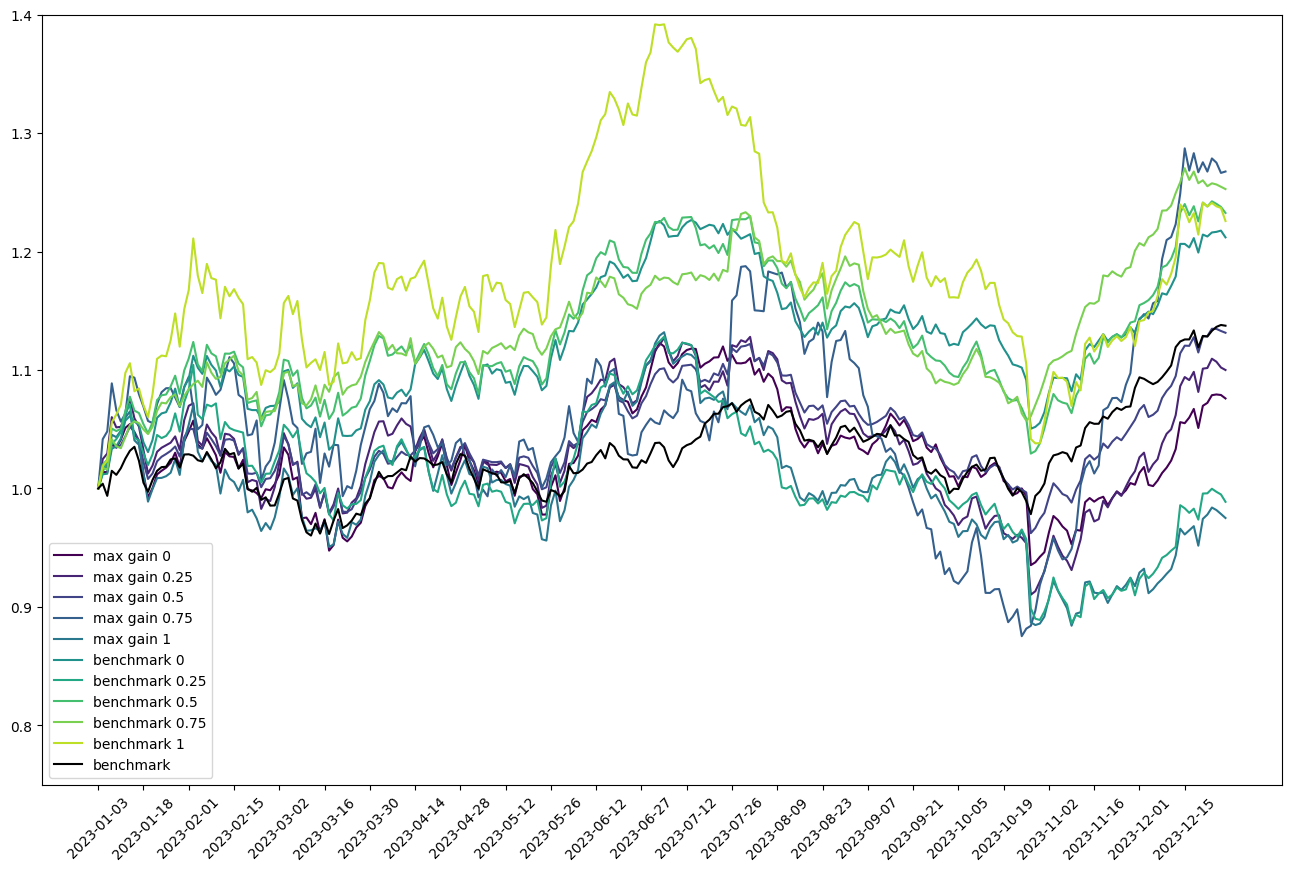

In [7]:
dsac_models = {
    'max gain 0': 'DSAC_max_gain_risk_0_inv_1_rew_15',
    'max gain 0.25': 'DSAC_max_gain_risk_0.25_inv_1_rew_15',
    'max gain 0.5': 'DSAC_max_gain_risk_0.5_inv_1_rew_15',
    'max gain 0.75': 'DSAC_max_gain_risk_0.75_inv_1_rew_15',
    'max gain 1': 'DSAC_max_gain_risk_1_inv_1_rew_15',
    'benchmark 0': 'DSAC_benchmark_risk_0_inv_1_rew_15',
    'benchmark 0.25': 'DSAC_benchmark_risk_0.25_inv_1_rew_15',
    'benchmark 0.5': 'DSAC_benchmark_risk_0.5_inv_1_rew_15',
    'benchmark 0.75': 'DSAC_benchmark_risk_0.75_inv_1_rew_15',
    'benchmark 1': 'DSAC_benchmark_risk_1_inv_1_rew_15',
}

from DSAC import DSAC

i = 0

plt.figure(figsize=(16,10))

for model_name,model_path in dsac_models.items():
    bare_model = DSAC(policy='MlpPolicy', env=eval_env, verbose=1)
    bare_model.set_parameters(f'./models/{model_path}.zip')
    
    portfolio_worths,sharpe_ratio,information_ratio,max_drawdown = extract_portfolio(eval_env, eval_benchmark, bare_model)
    
    print(f'{model_name} Sharpe Ratio: {sharpe_ratio},  Information Ratio: {information_ratio}, Final Portfolio Worth: {portfolio_worths[-1]}, Max Drawdown: {max_drawdown}')
    
    plt.plot(eval_dates,portfolio_worths, linestyle='-',label=f'{model_name}', color = plt.cm.viridis(i/len(dsac_models)))
    
    i += 1
    
    
eval_benchmark_relative = eval_benchmark/eval_benchmark[0]

plt.plot(eval_dates,eval_benchmark_relative, linestyle='-',label='benchmark', color = 'black')

plt.xticks(eval_dates[::(len(eval_dates)//25)],rotation=45)
plt.ylim(0.75,1.4)
plt.legend()
    